In [1]:
# MODEL 1 SENTIMENT ANALYSIS WITH LSTM

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmedosamamath/imdb-dataset")

print("Path to dataset files:", path)

 76%|███████████████████████████████████████████████████████████▊                   | 81.0M/107M [05:11<01:39, 273kB/s]

KeyboardInterrupt



In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 20000)

In [6]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

C:\Users\admin\AppData\Local\Temp\ipykernel_5060\479493918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= y_train, palette = "pastel")


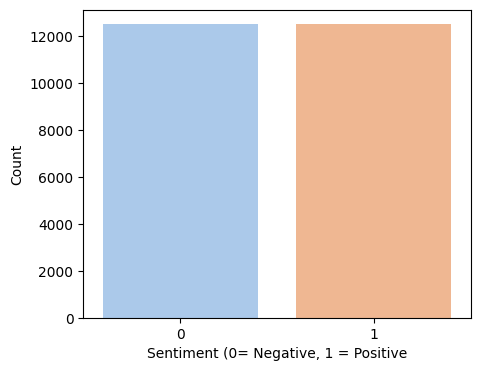

In [10]:
# class distribution (0= negative, 1 = positive
plt.figure(figsize = (5,4))
sns.countplot(x= y_train, palette = "pastel")
plt.xlabel("Sentiment (0= Negative, 1 = Positive")
plt.ylabel("Count")
plt.show()

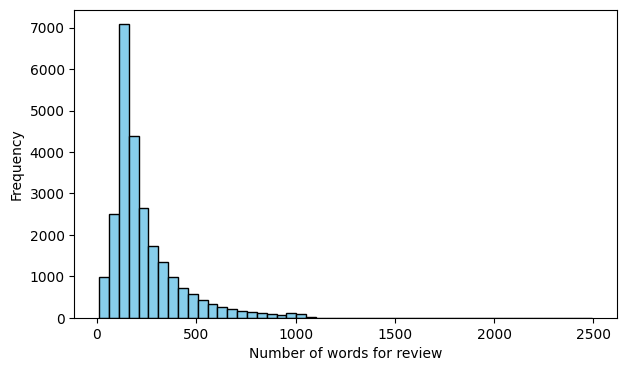

In [12]:
# Review length distribution 
review_lengths = [len(x) for x in X_train]
plt.figure(figsize = (7,4))
plt.hist(review_lengths, bins = 50, color = "skyblue", edgecolor = "black")
plt.xlabel("Number of words for review")
plt.ylabel("Frequency")
plt.show()

In [13]:
# PREPROCESSING # PADDING ALL SEQUENCES ALL REVIEWS HAVE EQUAL LENGTH
X_train = pad_sequences(X_train, maxlen = 200)
X_test = pad_sequences(X_test, maxlen = 200)

In [18]:
# BUILDING THE MODEL 
# Embedding layer: convert word IDS into 64 dimensional vectors
# LSTM layer: captures temporal dependencies
# Dense layers: acitvation function sigmoid ( 0 and 1)
model = Sequential([
    Embedding(20000, 64, input_length = 200),
    LSTM(64),
    Dense(1, activation = 'sigmoid')
])

In [19]:
# COMPILE MODEL 
# Binary crossentropy 
# adam 
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
#Training the model 
history = model.fit(X_train, y_train, epochs = 4, batch_size = 50, validation_split= 0.3)

Epoch 1/4
350/350 ━━━━━━━━━━━━━━━━━━━━ 46s 131ms/step - accuracy: 0.9771 - loss: 0.0717 - val_accuracy: 0.9708 - val_loss: 0.0806
Epoch 2/4
350/350 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.9863 - loss: 0.0429 - val_accuracy: 0.9465 - val_loss: 0.1405
Epoch 3/4
350/350 ━━━━━━━━━━━━━━━━━━━━ 47s 135ms/step - accuracy: 0.9768 - loss: 0.0715 - val_accuracy: 0.9684 - val_loss: 0.0886
Epoch 4/4
350/350 ━━━━━━━━━━━━━━━━━━━━ 47s 135ms/step - accuracy: 0.9945 - loss: 0.0205 - val_accuracy: 0.9591 - val_loss: 0.1124


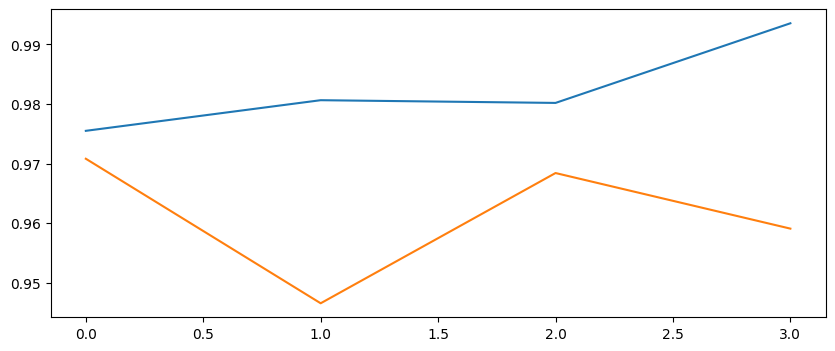

In [22]:
plt.figure(figsize =(10,4))
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')